## Missed Trash Pickups

In this data question you will work with service request data related to missed trash pickups from [hubNashville](https://hub.nashville.gov), Metro Nashville government's comprehensive customer service system.

Your goal is to practice working with dates, times, and time-based aggregation in pandas while exploring patterns in missed pickups. You’ll also calculate fines based on missed pickups within a rolling time window.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
th_report = pd.read_csv('data/trash_hauler_report_with_lat_lng.csv')
th_report

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/1/2019,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1781137.263,632448.5511,-86.633970,36.069130
20222,267126,11/1/2019,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1749711.399,669201.6016,-86.741242,36.169482
20223,267130,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1770293.388,674936.3038,-86.671647,36.185643
20224,267134,11/1/2019,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1785224.998,627146.4002,-86.620025,36.054637


**Step 1: Data Preparation**
1. Convert any date columns to datetime using pd.to_datetime(). 

In [2]:
th_report['Date Opened'] = pd.to_datetime(th_report['Date Opened'],
                                           format = "%m/%d/%Y")

In [3]:
th_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Request Number    20226 non-null  int64         
 1   Date Opened       20226 non-null  datetime64[ns]
 2   Request           20226 non-null  object        
 3   Description       20195 non-null  object        
 4   Incident Address  20217 non-null  object        
 5   Zip Code          20151 non-null  float64       
 6   Trash Hauler      19325 non-null  object        
 7   Trash Route       19279 non-null  object        
 8   Council District  20177 non-null  float64       
 9   State Plan X      20198 non-null  float64       
 10  State Plan Y      20198 non-null  float64       
 11  LONGITUDE         20198 non-null  float64       
 12  LATITUDE          20198 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 2.0+ MB


**Step 1: Data Preparation**
1. Convert any date columns to datetime using pd.to_datetime().  
2. Create new columns for:  
    * year, month, day
    * day_of_week (or weekday name)

In [4]:
th_report['year'] = th_report['Date Opened'].dt.year
th_report['month'] = th_report['Date Opened'].dt.month
th_report['day'] = th_report['Date Opened'].dt.day
th_report['day_of_week'] = th_report['Date Opened'].dt.day_name()

In [5]:
th_report.head(5)


,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE,year,month,day,day_of_week
0,25270,2017-11-01,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292,2017,11,1,Wednesday
1,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470,2017,11,1,Wednesday
2,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923,2017,11,1,Wednesday
3,25307,2017-11-01,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652,2017,11,1,Wednesday
4,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861,2017,11,1,Wednesday


3. Filter the data so that you are only analyzing actual missed pickups.

In [16]:
missed_pickups = th_report[th_report['Description'] == 'Missed'].copy()
missed_pickups.head(5)

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE,year,month,day,day_of_week
100,25987,2017-11-03,Trash - Curbside/Alley Missed Pickup,Missed,1609 Lillian St,37206.0,METRO,9506,6.0,1749557.765,670298.4009,-86.741791,36.172492,2017,11,3,Friday
110,26039,2017-11-03,Trash - Curbside/Alley Missed Pickup,Missed,816 Dresden Ct,37013.0,RED RIVER,3502,33.0,1790883.757,635609.4987,-86.601058,36.077982,2017,11,3,Friday
262,28207,2017-11-15,Trash - Curbside/Alley Missed Pickup,Missed,1837 meade ave,37207.0,RED RIVER,3202,2.0,1736443.121,681965.5090,-86.786540,36.204259,2017,11,15,Wednesday
270,28310,2017-11-15,Trash - Curbside/Alley Missed Pickup,Missed,736 Branch Creek Rd,37209.0,RED RIVER,2301,24.0,1714100.530,657093.8310,-86.861523,36.135422,2017,11,15,Wednesday
296,28577,2017-11-16,Trash - Curbside/Alley Missed Pickup,Missed,582 Valleywood Dr,37211.0,RED RIVER,3401,27.0,1751898.565,630684.8002,-86.732855,36.063724,2017,11,16,Thursday


**Step 2: Explore Time-Based Patterns**  
Answer these simpler questions first:  
1. Which day of the week has the highest number of missed pickups?
2. Missed pickups over time: 

In [7]:
missed_pickups.loc[:, 'day_of_week'] = missed_pickups['Date Opened'].dt.day_name()

In [8]:
day_counts = missed_pickups['Date Opened'].value_counts()

In [9]:
highest_missed_day = day_counts.idxmax()
highest_missed_count = day_counts.max()

 * Find the total number of missed pickups by month. Plot this with a line chart. 

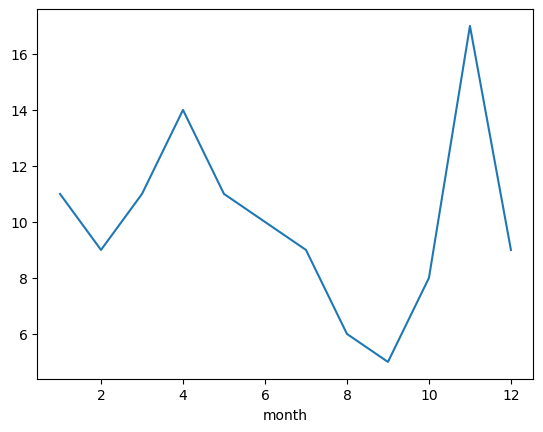

In [17]:
missed_pickups['month'] = missed_pickups['Date Opened'].dt.month
missed_pickups.groupby('month').size().plot();

* Create a plot showing the number of missed pickups per day.  

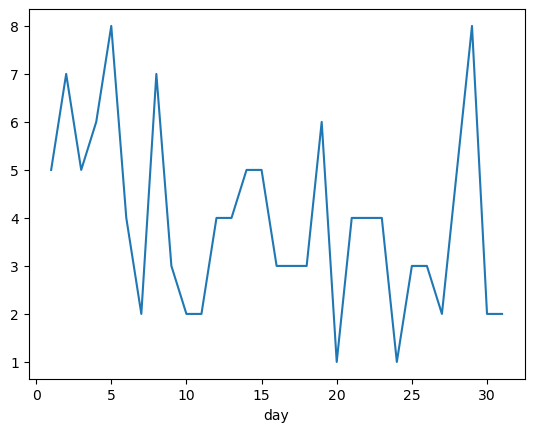

In [11]:
missed_pickups['day'] = missed_pickups['Date Opened'].dt.day
missed_pickups.groupby('day').size().plot();

* Compute a rolling 30-day average of daily missed pickups. Visualize your results with a line chart to see trends.


In [12]:
missed_pickups_per_day = missed_pickups.groupby('Date Opened').size().reset_index()
missed_pickups_per_day.columns = ['day', 'Missed']
missed_pickups_per_day['day'] = pd.to_datetime(missed_pickups_per_day['day']).copy()
missed_pickups_per_day.head()

,day,Missed
0,2017-11-03,2
1,2017-11-15,2
2,2017-11-16,1
3,2017-11-21,2
4,2017-11-29,3


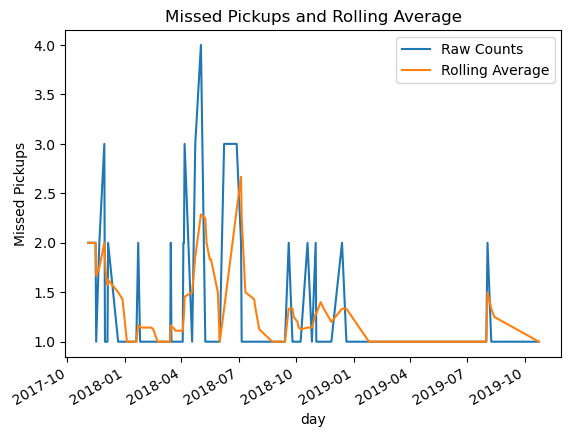

In [13]:
missed_pickups_per_day['rolling_30D'] = missed_pickups_per_day.rolling(window = '30D', on='day')['Missed'].mean()
ax = missed_pickups_per_day.plot(x='day', y='Missed', label= 'Raw Counts')
missed_pickups_per_day.plot(x='day', y='rolling_30D', label= 'Rolling Average', ax=ax);
ax.set_ylabel('Missed Pickups')
ax.set_title('Missed Pickups and Rolling Average')
plt.show()

**Step 3: Main Task – 180-Day Rolling Fine Calculation**  
Metro Nashville charges fines for excessive missed trash pickups. It uses the following method to calculate the total fine:  A $1500 fine is charged for each missed pickup that is the third or subsequent one at the same address within a 180-day window. Multiple fines may apply to the same address.  
What is the total fine across all addresses? **Hint:** The rolling method can be use in combination with groupby.

In [14]:
missed_pickups_per_day = missed_pickups.groupby(['Date Opened', 'Incident Address']).size().reset_index()
missed_pickups_per_day.columns = ['day', 'Incident Address', 'Missed']
missed_pickups_per_day['day'] = pd.to_datetime(missed_pickups_per_day['day'])
missed_pickups_per_day.head()

,day,Incident Address,Missed
0,2017-11-03,1609 Lillian St,1
1,2017-11-03,816 Dresden Ct,1
2,2017-11-15,1837 meade ave,1
3,2017-11-15,736 Branch Creek Rd,1
4,2017-11-16,582 Valleywood Dr,1


In [15]:
missed_pickups_per_day['day'] = pd.to_datetime(missed_pickups_per_day['day'])
missed_pickups_per_day.set_index('day', inplace=True)
missed_count = (
    missed_pickups_per_day.groupby('Incident Address')['Missed']
    .rolling('180D', min_periods=1)
    .sum()
)

missed_count = missed_count.reset_index()

missed_count.rename(columns={'Missed': 'missed_count'}, inplace=True)

missed_pickups_per_day = missed_pickups_per_day.reset_index()  
missed_pickups_per_day = missed_pickups_per_day.merge(missed_count, on=['day', 'Incident Address'], how='left')
missed_pickups_per_day.drop(columns=['Missed'], inplace=True)
missed_pickups_per_day['fines'] = 0
missed_pickups_per_day.loc[missed_pickups_per_day['missed_count'] > 2, 'fines'] = (
    (missed_pickups_per_day['missed_count'] - 2) * 1500
)

total_fine = missed_pickups_per_day['fines'].sum()

print(f'Total Fine: {total_fine}')

missed_pickups_per_day

Total Fine: 1500


,day,Incident Address,missed_count,fines
0,2017-11-03,1609 Lillian St,1.0,0
1,2017-11-03,816 Dresden Ct,1.0,0
2,2017-11-15,1837 meade ave,1.0,0
3,2017-11-15,736 Branch Creek Rd,1.0,0
4,2017-11-16,582 Valleywood Dr,1.0,0
...,...,...,...,...
114,2019-08-02,"160 Brian Cir, Nashville, TN 37013, United States",1.0,0
115,2019-08-02,"3952 Keeley Dr, Nashville, TN 37211, United St...",1.0,0
116,2019-08-08,"405 Wilsonia Ave, Nashville, TN 37205, United ...",1.0,0
117,2019-08-13,"4621 Log Cabin Rd, Nashville, Tennessee, 37216",1.0,0
